In [78]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import json
from skimage.feature import hog
import numpy as np
import pickle
from hog_subsample import detect_cars
from utils import *
from scipy.ndimage.measurements import label

In [79]:
with open('config.json') as data_file:    
    data = json.load(data_file)
    color_space = data["color_space"]

    temp_spatial_size = data["spatial_size"]
    spatial_size = (temp_spatial_size[0], temp_spatial_size[1])    
    
    hist_bins = data["hist_bins"]
    
    pix_per_cell = data["pix_per_cell"]
    cell_per_block = data["cell_per_block"]
    orient = data["orient"]
    hog_channel = data["hog_channel"]

    temp_window_dim = data["window_dim"]
    window_dim = (temp_window_dim[0], temp_window_dim[1])
    winStep = data["winStep"]
    minProb = data["minProb"]
    pyramidScale = data["pyramidScale"]

    ystart = data["ystart"]
    ystop = data["ystop"]

    if data["spatial_feat"] == 1:
        spatial_feat = True
    else:
        spatial_feat = False
    
    if data["hist_feat"] == 1:
        hist_feat = True
    else:
        hist_feat = False
    
    if data["hog_feat"] == 1:
        hog_feat = True
    else:
        hog_feat = False

    print("color space: {}".format(color_space))
    
    print("is spatial_feat:{}".format(spatial_feat))
    print("\tspatial_size:{}".format(spatial_size))
    
    print("is hist_feat:{}".format(hist_feat))
    print("\thist_bins:{}".format(hist_bins))

    print("is hog_feat:{}".format(hog_feat))
    print("\tpix_per_cel:{}".format(pix_per_cell))
    print("\tcell_per_block:{}".format(cell_per_block))
    print("\torient:{}".format(orient)) 

    
model_path = 'model.pkl'
X_Scaler_path = 'x_scaler.pkl'
with open(model_path, mode='rb') as fp:
    svm_model = pickle.load(fp)

with open(X_Scaler_path, mode='rb') as fp:
    X_scaler = pickle.load(fp)

color space: YCrCb
is spatial_feat:True
	spatial_size:(32, 32)
is hist_feat:True
	hist_bins:32
is hog_feat:True
	pix_per_cel:16
	cell_per_block:2
	orient:11


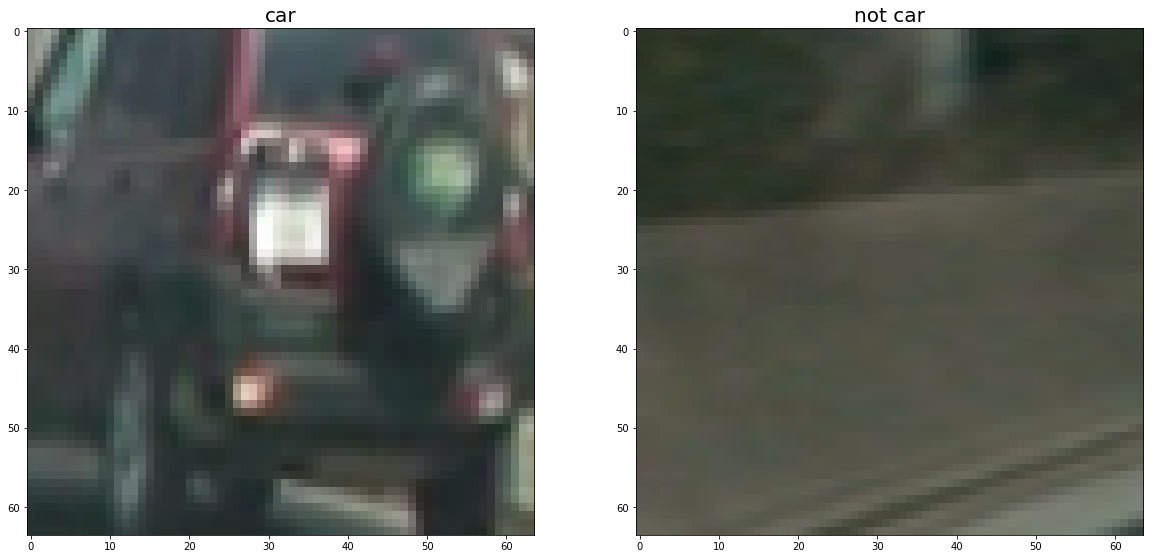

In [80]:
%matplotlib inline
car_file = '../../Dataset/cars_notcars_dataset/vehicles/GTI_Right/image0139.png'
not_car_file = '../../Dataset/cars_notcars_dataset/non-vehicles/GTI/image1763.png'
car_image = mpimg.imread(car_file)
not_car_image = mpimg.imread(not_car_file)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(car_image)
ax1.set_title('car', fontsize=20)
ax2.imshow(not_car_image)
ax2.set_title('not car', fontsize=20)

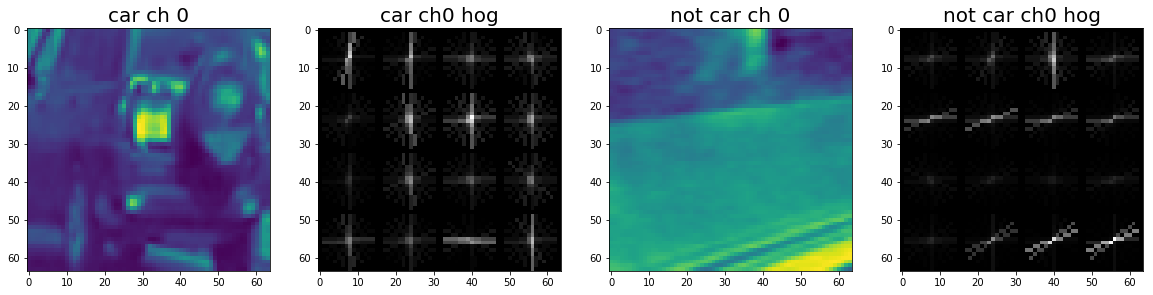

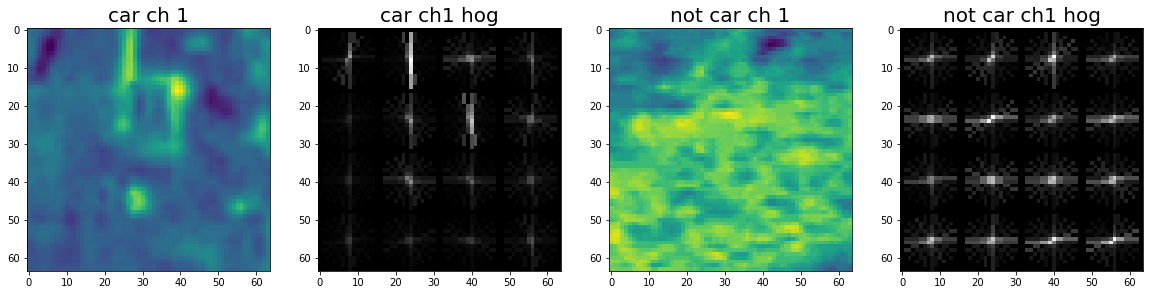

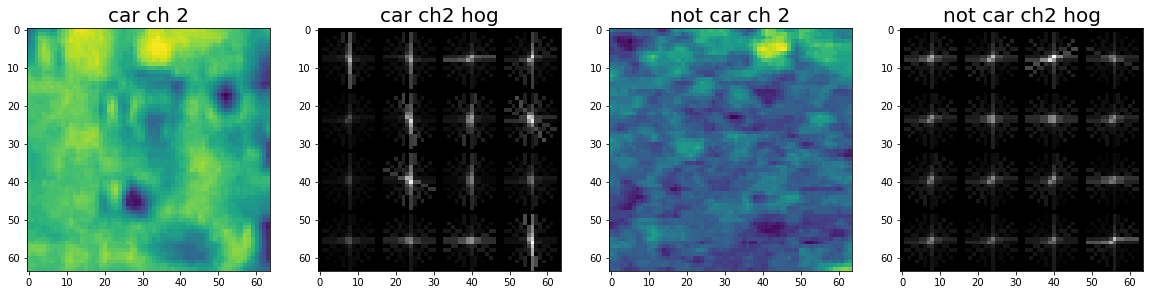

In [81]:
# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features

# car_image = cv2.cvtColor(car_image, cv2.COLOR_RGB2YCrCb)
# car_hog_ch0 = get_hog_features(img=car_image[:,:,0], orient=orient, pix_per_cell=pix_per_cell, cell_per_block=cell_per_block)
# car_hog_ch1 = get_hog_features(img=car_image[:,:,1], orient=orient, pix_per_cell=pix_per_cell, cell_per_block=cell_per_block)
# car_hog_ch2 = get_hog_features(img=car_image[:,:,2], orient=orient, pix_per_cell=pix_per_cell, cell_per_block=cell_per_block)

# not_Car_image = cv2.cvtColor(car_image, cv2.COLOR_RGB2YCrCb)
# not_car_hog_ch0 = get_hog_features(img=not_Car_image[:,:,0], orient=orient, pix_per_cell=pix_per_cell, cell_per_block=cell_per_block)
# not_car_hog_ch1 = get_hog_features(img=not_Car_image[:,:,1], orient=orient, pix_per_cell=pix_per_cell, cell_per_block=cell_per_block)
# not_car_hog_ch2 = get_hog_features(img=not_Car_image[:,:,2], orient=orient, pix_per_cell=pix_per_cell, cell_per_block=cell_per_block)

tr_car = cv2.cvtColor(car_image, cv2.COLOR_RGB2YCrCb)
tr_not_car = cv2.cvtColor(not_car_image, cv2.COLOR_RGB2YCrCb)
for i in range(3):
    f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 10))
    car_ch = tr_car[:,:,i]
    not_car_ch = tr_not_car[:,:,i]
    features, car_hog = get_hog_features(img=car_ch, orient=orient, pix_per_cell=pix_per_cell, cell_per_block=cell_per_block)
    features, not_car_hog = get_hog_features(img=not_car_ch, orient=orient, pix_per_cell=pix_per_cell, cell_per_block=cell_per_block)
    
    ax1.imshow(car_ch)
    ax1.set_title('car ch {}'.format(i), fontsize=20)
    ax2.imshow(car_hog, cmap="gray")
    ax2.set_title('car ch{} hog'.format(i), fontsize=20)
    ax3.imshow(not_car_ch)
    ax3.set_title('not car ch {}'.format(i), fontsize=20)
    ax4.imshow(not_car_hog, cmap="gray")
    ax4.set_title('not car ch{} hog'.format(i), fontsize=20)


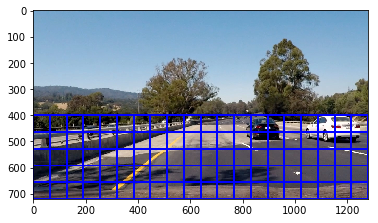

In [82]:
def window_searech(img, ystart, ystop, pix_per_cell, cell_per_block, window_dim):
    draw_img = np.copy(img)
    nxblocks = (img.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (img.shape[0] // pix_per_cell) - cell_per_block + 1
    cells_per_step = 2
    window = window_dim[0]
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    
    
    for yb in range(nysteps):
        for xb in range(nxsteps):
            ypos = yb*window + ystart
            xpos = xb*window
            endY = ypos+window + ystart
            endX = xpos+window
            cv2.rectangle(draw_img, (xpos, ypos), (endX, endY), (0, 0, 255), 6)
    
    plt.imshow(draw_img)

test_image = mpimg.imread("test_images/test4.jpg")
window_searech(test_image, ystart=ystart, ystop=ystop, 
               pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
               window_dim=window_dim)





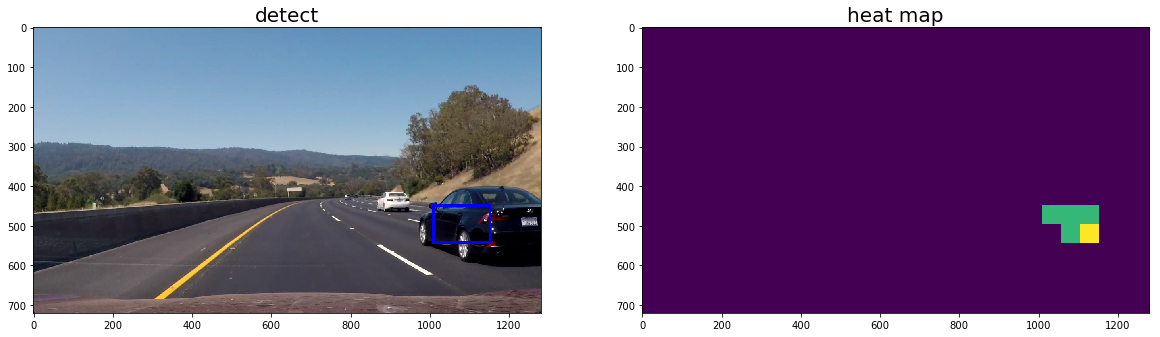

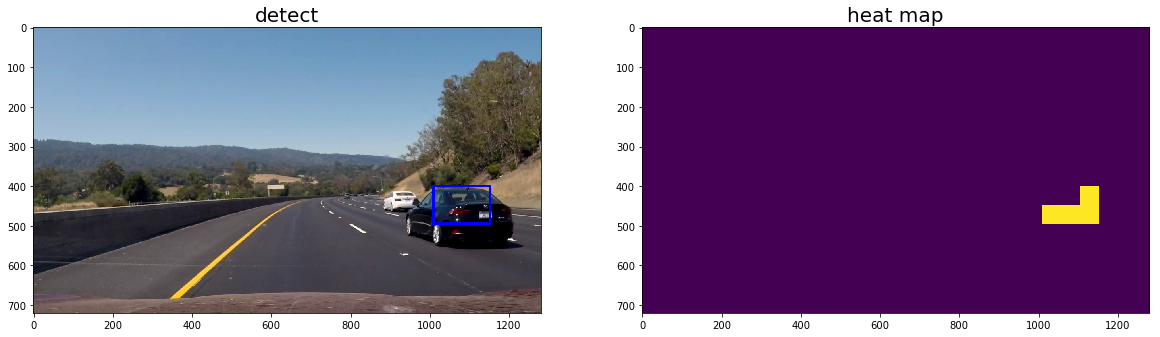

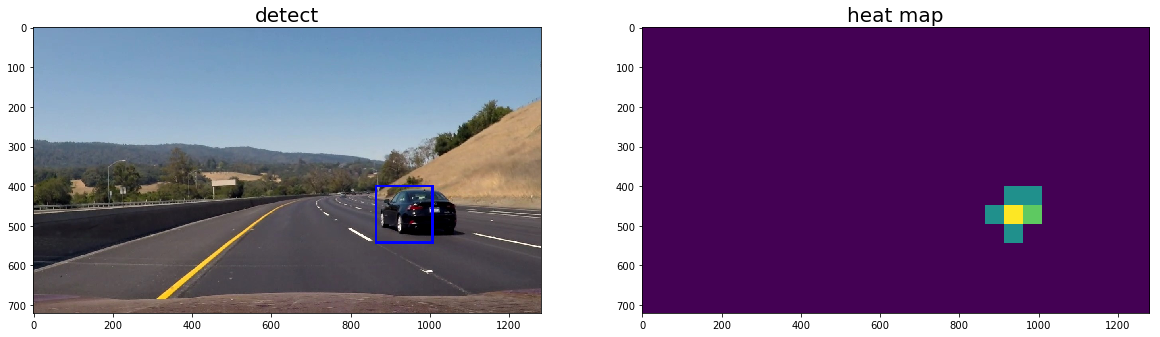

In [87]:
file_list = []
file_list.append("result_images/project_video.mp4_1.jpg")
file_list.append("result_images/project_video.mp4_2.jpg")
file_list.append("result_images/project_video.mp4_3.jpg")

for image_file in file_list:
    image = mpimg.imread(image_file)
    boxes = detect_cars(img=image, 
            ystart=ystart, ystop=ystop, scale=pyramidScale, 
            svc=svm_model, X_scaler=X_scaler, cspace=color_space, 
            orient=orient, pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
            spatial_size=spatial_size, 
            hist_bins=hist_bins,
            spatial_feat=spatial_feat, hist_feat=hist_feat, hog_feat=hog_feat)

    heat = np.zeros_like(image[:,:,0]).astype(np.float)
    # Add heat to each box in box list
    heat = add_heat(heat,boxes)    
    # Apply threshold to help remove false positives
    heat = apply_threshold(heat,1)
    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)
    # Find final boxes from heatmap using label function
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(image), labels)


    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    ax1.imshow(draw_img)
    ax1.set_title('detect', fontsize=20)
    ax2.imshow(heatmap)
    ax2.set_title('heat map', fontsize=20)
